# Forward (Pixels)

In [1]:
%matplotlib
import sys
from lib.restartable_pendulum import RestartablePendulumEnv
from lib import state_rep_torch as srt
import gym
import numpy as np
from matplotlib import pyplot as plt
import torch
from lib import utils
from lib import encoder_wrappers as ew

# specify environment information
n_repeats = 3 # step the environment this many times for each action, concatenate the pixel observations
env = RestartablePendulumEnv(repeats=n_repeats,pixels=True)

save_dir = "./"

net = torch.load(save_dir+"/fwd.net")

# what follows is code to visualize the representations
d = 5 # must match the final entry in layers
n_samps = 500
env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    X[i,:] = env.reset(state=[ang,0])
utils.visualize_trajectory(X)


Using matplotlib backend: agg


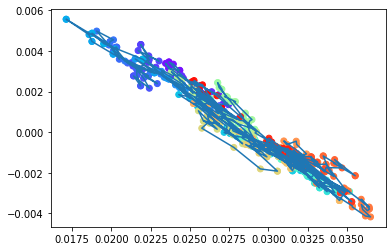

In [5]:
utils.visualize_trajectory(X)

# Forward + Reward (Pixels)

In [6]:
# what follows is code to visualize the representations

net_fwd_rew = torch.load(save_dir+"/fwd.net")

d = 9 # must match the final entry in layers
n_samps = 500
#env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    #print(env.reset(state=[ang,0]))
    obs=env.reset(state=[ang,0])
    print(obs)
    with torch.no_grad():
        X[i,:] = net_fwd_rew.encoder.forward(torch.from_numpy(np.expand_dims(obs,0)).float())
utils.visualize_trajectory(X)

[ 0.02100027  0.00688989 -0.00024998  0.011848    0.00565061]


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [16, 1, 8, 8], but got 2-dimensional input of size [1, 5] instead

# Rewards (only)

In [4]:
# what follows is code to visualize the representations

net_rew = torch.load(save_dir+"/rew.net")

d = 9 # must match the final entry in layers
n_samps = 500
#env = ew.TorchEncoderWrapper(env,net.encoder,np.eye(d))
X = np.empty((n_samps,d))
for i,ang in enumerate(np.linspace(0,2*np.pi,n_samps)): # go through the angles from 0 to 2pi
    #print(env.reset(state=[ang,0]))
    obs=env.reset(state=[ang,0])
    print(obs)
    with torch.no_grad():
        X[i,:] = net_rew.encoder.forward(torch.from_numpy(np.expand_dims(obs,0)).float())
utils.visualize_trajectory(X)

# Matplotlib test

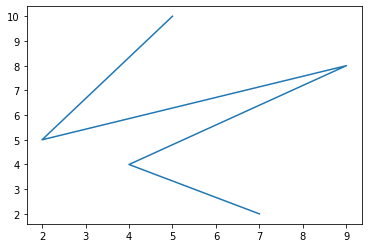

In [4]:
%matplotlib inline
# importing matplotlib module  
from matplotlib import pyplot as plt  
  
# x-axis values  
x = [5, 2, 9, 4, 7]  
  
# Y-axis values  
y = [10, 5, 8, 4, 2]  
  
# Function to plot  
plt.plot(x, y)  
  
# function to show the plot  
plt.show() 